In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

1. Understanding the Dataset 

In [2]:
# a. Load and scrutinize the dataset to comprehend its structure, encompassing columns and data types.

In [3]:
bank_data = pd.read_csv(r"D:\Vattan\ABADS\Python\Python Graded Project\bank_details.csv")

C:\Users\hp\AppData\Local\Temp\ipykernel_8888\965053354.py:1: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  bank_data = pd.read_csv(r"D:\Vattan\ABADS\Python\Python Graded Project\bank_details.csv")


In [4]:
bank_data

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [5]:
# Because the first line of the above matrix was not showing the column names, so we had to change the Header using iloc nad reset_index.

In [6]:
new_header = bank_data.iloc[1] 
bank_data = bank_data[2:] 
bank_data.columns = new_header
bank_data = bank_data.reset_index(drop=True)
bank_data.head(5)

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  object
 1   age         45191 non-null  object
 2   salary      45211 non-null  object
 3   balance     45211 non-null  object
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  object
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  object
 15  pdays       45211 non-null  object
 16  previous    45211 non-null  object
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: object(19)
memory usage: 6.6+ MB


In [8]:
print('Null Values:', bank_data.isnull().sum())
print('Duplicate Values:', bank_data.duplicated().sum())

Null Values: 1
customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64
Duplicate Values: 0


In [9]:
# To fill missing values using bfill

In [10]:
bank_data1 = bank_data.copy()
bank_data1['month'].fillna(method = 'bfill', inplace = True)
print("\n bank data after filling null values with bfill")
print(bank_data1)


 bank data after filling null values with bfill
1     customerid   age  salary balance   marital                  jobedu  \
0              1    58  100000    2143   married     management,tertiary   
1              2    44   60000      29    single    technician,secondary   
2              3    33  120000       2   married  entrepreneur,secondary   
3              4    47   20000    1506   married     blue-collar,unknown   
4              5    33       0       1    single         unknown,unknown   
...          ...   ...     ...     ...       ...                     ...   
45206      45207  51.0   60000     825   married     technician,tertiary   
45207      45208  71.0   55000    1729  divorced         retired,primary   
45208      45209  72.0   55000    5715   married       retired,secondary   
45209      45210  57.0   20000     668   married   blue-collar,secondary   
45210      45211  37.0  120000    2971   married  entrepreneur,secondary   

1     targeted default housing loan   

C:\Users\hp\AppData\Local\Temp\ipykernel_8888\4183012136.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bank_data1['month'].fillna(method = 'bfill', inplace = True)


In [11]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45211 non-null  object
 1   age         45191 non-null  object
 2   salary      45211 non-null  object
 3   balance     45211 non-null  object
 4   marital     45211 non-null  object
 5   jobedu      45211 non-null  object
 6   targeted    45211 non-null  object
 7   default     45211 non-null  object
 8   housing     45211 non-null  object
 9   loan        45211 non-null  object
 10  contact     45211 non-null  object
 11  day         45211 non-null  object
 12  month       45161 non-null  object
 13  duration    45211 non-null  object
 14  campaign    45211 non-null  object
 15  pdays       45211 non-null  object
 16  previous    45211 non-null  object
 17  poutcome    45211 non-null  object
 18  response    45181 non-null  object
dtypes: object(19)
memory usage: 6.6+ MB


In [12]:
# used drop na for age and response because we didnt have any reference to fill the missing values for these two.

In [13]:
bank_data2 = bank_data1.copy()
bank_data2
bank_data3 = bank_data2.dropna()
print("bank_data after drop")
bank_data3

bank_data after drop


1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


In [14]:
bank_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  45161 non-null  object
 1   age         45161 non-null  object
 2   salary      45161 non-null  object
 3   balance     45161 non-null  object
 4   marital     45161 non-null  object
 5   jobedu      45161 non-null  object
 6   targeted    45161 non-null  object
 7   default     45161 non-null  object
 8   housing     45161 non-null  object
 9   loan        45161 non-null  object
 10  contact     45161 non-null  object
 11  day         45161 non-null  object
 12  month       45161 non-null  object
 13  duration    45161 non-null  object
 14  campaign    45161 non-null  object
 15  pdays       45161 non-null  object
 16  previous    45161 non-null  object
 17  poutcome    45161 non-null  object
 18  response    45161 non-null  object
dtypes: object(19)
memory usage: 6.9+ MB


In [15]:
#Converting Dtypes
bank_data3[['customerid', 'age', 'salary', 'balance', 'campaign', 'pdays', 'previous']] = bank_data3[['customerid', 'age', 'salary', 'balance', 'campaign', 'pdays', 'previous']].astype(float)
bank_data3.info()

C:\Users\hp\AppData\Local\Temp\ipykernel_8888\3606992769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data3[['customerid', 'age', 'salary', 'balance', 'campaign', 'pdays', 'previous']] = bank_data3[['customerid', 'age', 'salary', 'balance', 'campaign', 'pdays', 'previous']].astype(float)


<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45161 non-null  float64
 1   age         45161 non-null  float64
 2   salary      45161 non-null  float64
 3   balance     45161 non-null  float64
 4   marital     45161 non-null  object 
 5   jobedu      45161 non-null  object 
 6   targeted    45161 non-null  object 
 7   default     45161 non-null  object 
 8   housing     45161 non-null  object 
 9   loan        45161 non-null  object 
 10  contact     45161 non-null  object 
 11  day         45161 non-null  object 
 12  month       45161 non-null  object 
 13  duration    45161 non-null  object 
 14  campaign    45161 non-null  float64
 15  pdays       45161 non-null  float64
 16  previous    45161 non-null  float64
 17  poutcome    45161 non-null  object 
 18  response    45161 non-null  object 
dtypes: float64(7), object(12)
memo

In [16]:
bank_data3.tail(5)

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
45206,45207.0,51.0,60000.0,825.0,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3.0,-1.0,0.0,unknown,yes
45207,45208.0,71.0,55000.0,1729.0,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2.0,-1.0,0.0,unknown,yes
45208,45209.0,72.0,55000.0,5715.0,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5.0,184.0,3.0,success,yes
45209,45210.0,57.0,20000.0,668.0,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4.0,-1.0,0.0,unknown,no
45210,45211.0,37.0,120000.0,2971.0,married,"entrepreneur,secondary",yes,no,no,no,cellular,17,"nov, 2017",6.01666666666667 min,2.0,188.0,11.0,other,no


In [17]:
# to convert duration into same pattern- 
def convert_to_seconds(time_str):
    # Convert to lowercase to handle different case formats
    time_str = time_str.lower()
    
    # Check if the time is in minutes
    if 'min' in time_str:
        min = float(time_str.split()[0])  # Extract numeric part
        return min * 60  # Convert to seconds
    # Check if the time is in seconds
    elif 'sec' in time_str:
        sec = float(time_str.split()[0])  # Extract numeric part
        return sec

In [18]:
# After changing the units, added the new column as TIME
bank_data3['TIME'] = bank_data3['duration'].apply(convert_to_seconds)
bank_data3

C:\Users\hp\AppData\Local\Temp\ipykernel_8888\1416653686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_data3['TIME'] = bank_data3['duration'].apply(convert_to_seconds)


1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,TIME
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no,261.0
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no,151.0
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no,76.0
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1.0,-1.0,0.0,unknown,no,92.0
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1.0,-1.0,0.0,unknown,no,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3.0,-1.0,0.0,unknown,yes,977.0
45207,45208.0,71.0,55000.0,1729.0,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2.0,-1.0,0.0,unknown,yes,456.0
45208,45209.0,72.0,55000.0,5715.0,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5.0,184.0,3.0,success,yes,1127.0
45209,45210.0,57.0,20000.0,668.0,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4.0,-1.0,0.0,unknown,no,508.0


In [19]:
bank_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45161 non-null  float64
 1   age         45161 non-null  float64
 2   salary      45161 non-null  float64
 3   balance     45161 non-null  float64
 4   marital     45161 non-null  object 
 5   jobedu      45161 non-null  object 
 6   targeted    45161 non-null  object 
 7   default     45161 non-null  object 
 8   housing     45161 non-null  object 
 9   loan        45161 non-null  object 
 10  contact     45161 non-null  object 
 11  day         45161 non-null  object 
 12  month       45161 non-null  object 
 13  duration    45161 non-null  object 
 14  campaign    45161 non-null  float64
 15  pdays       45161 non-null  float64
 16  previous    45161 non-null  float64
 17  poutcome    45161 non-null  object 
 18  response    45161 non-null  object 
 19  TIME        45161 non-null  fl

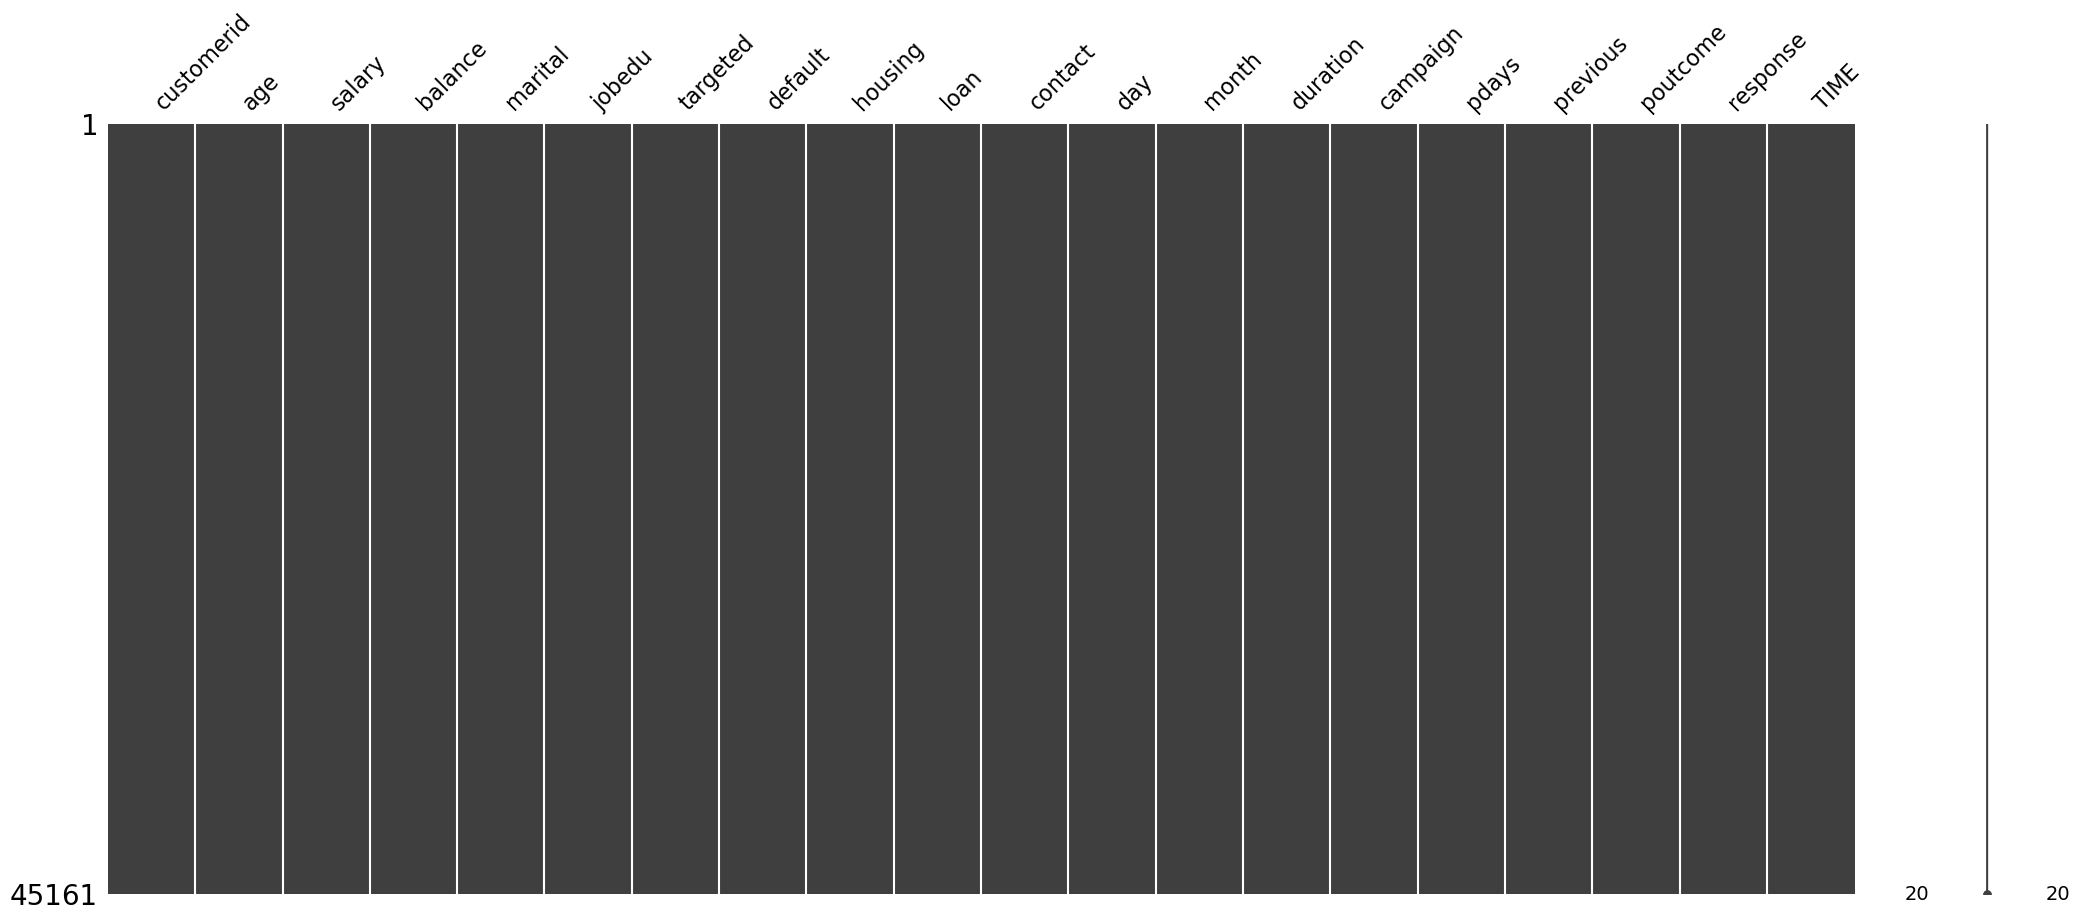

In [20]:
# For Missing Values- 
import missingno as msno
msno.matrix(bank_data3)
plt.show()

<Axes: xlabel='1'>

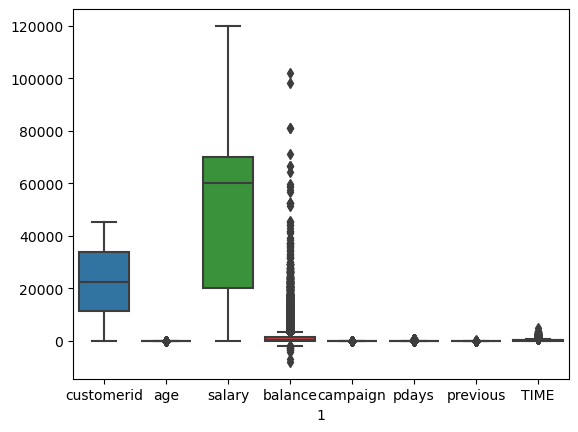

In [21]:
# To check outliers- 
sns.boxplot(bank_data3)

2. Descriptive Statistics 

In [22]:
# a. Deriving summary statistics (mean, median, standard deviation) for relevant columns.

In [23]:
bank_data3.describe().T

,count,mean,std,min,25%,50%,75%,max
1,,,,,,,,
customerid,45161.0,22607.785479,13050.472017,1.0,11306.0,22607.0,33909.0,45211.0
age,45161.0,40.935763,10.618790,18.0,33.0,39.0,48.0,95.0
salary,45161.0,57004.849317,32087.698810,0.0,20000.0,60000.0,70000.0,120000.0
balance,45161.0,1362.850690,3045.939589,-8019.0,72.0,448.0,1428.0,102127.0
campaign,45161.0,2.763358,3.096964,1.0,1.0,2.0,3.0,63.0
pdays,45161.0,40.182015,100.079372,-1.0,-1.0,-1.0,-1.0,871.0
previous,45161.0,0.580014,2.303563,0.0,0.0,0.0,0.0,275.0
TIME,45161.0,258.166427,257.587748,0.0,103.0,180.0,319.0,4918.0


In [24]:
# b. Examine the distribution of the target variable, indicating responses to the term deposit campaign.

<Axes: xlabel='response', ylabel='campaign'>

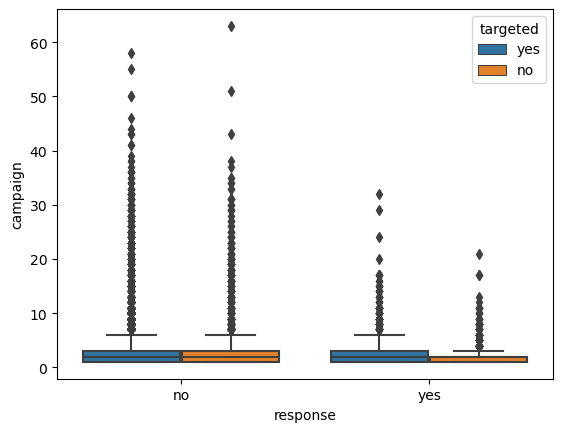

In [25]:
sns.boxplot(x='response', y='campaign', hue='targeted', data= bank_data3)

3. Univariate Analysis 

D:\Vattan\ABADS\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

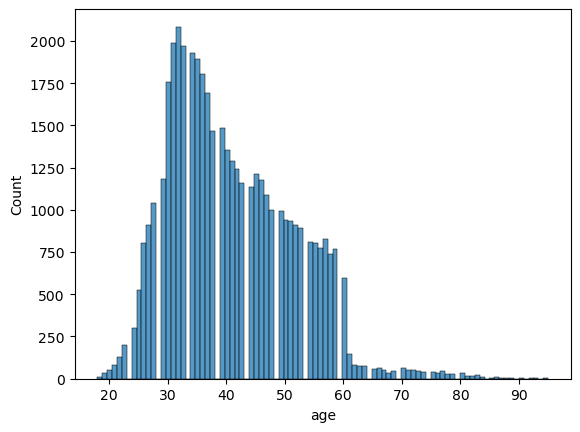

In [26]:
sns.histplot(bank_data3['age'])

D:\Vattan\ABADS\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='balance', ylabel='Density'>

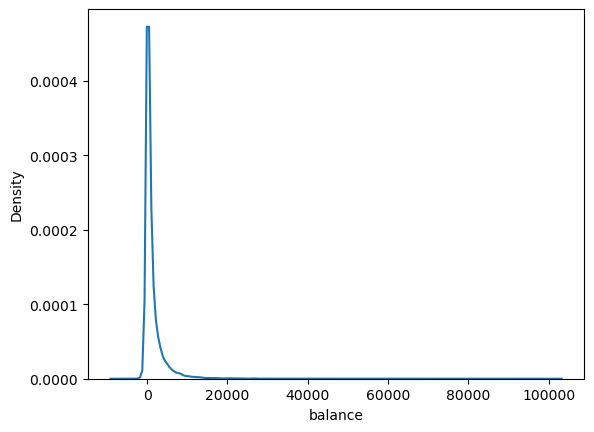

In [27]:
sns.kdeplot(bank_data3['balance'])

<Axes: >

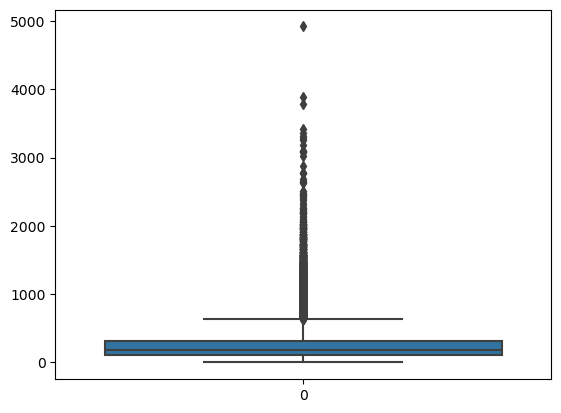

In [28]:
sns.boxplot(bank_data3['TIME'])

4. Bivariate Analysis 

In [29]:
#To split the jobedu column
bank_data4 = bank_data3.copy()
bank_data4[["Job", "Edu"]] = bank_data4['jobedu'].str.split(",", expand = True)
bank_data4

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,month,duration,campaign,pdays,previous,poutcome,response,TIME,Job,Edu
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,...,"may, 2017",261 sec,1.0,-1.0,0.0,unknown,no,261.0,management,tertiary
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,...,"may, 2017",151 sec,1.0,-1.0,0.0,unknown,no,151.0,technician,secondary
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,...,"may, 2017",76 sec,1.0,-1.0,0.0,unknown,no,76.0,entrepreneur,secondary
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,...,"may, 2017",92 sec,1.0,-1.0,0.0,unknown,no,92.0,blue-collar,unknown
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,...,"may, 2017",198 sec,1.0,-1.0,0.0,unknown,no,198.0,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,married,"technician,tertiary",yes,no,no,no,...,"nov, 2017",16.2833333333333 min,3.0,-1.0,0.0,unknown,yes,977.0,technician,tertiary
45207,45208.0,71.0,55000.0,1729.0,divorced,"retired,primary",yes,no,no,no,...,"nov, 2017",7.6 min,2.0,-1.0,0.0,unknown,yes,456.0,retired,primary
45208,45209.0,72.0,55000.0,5715.0,married,"retired,secondary",yes,no,no,no,...,"nov, 2017",18.7833333333333 min,5.0,184.0,3.0,success,yes,1127.0,retired,secondary
45209,45210.0,57.0,20000.0,668.0,married,"blue-collar,secondary",yes,no,no,no,...,"nov, 2017",8.46666666666667 min,4.0,-1.0,0.0,unknown,no,508.0,blue-collar,secondary


In [30]:
# a
# As Age, Salary and Time are independent variables, these three have been considered with respect to Targeted.

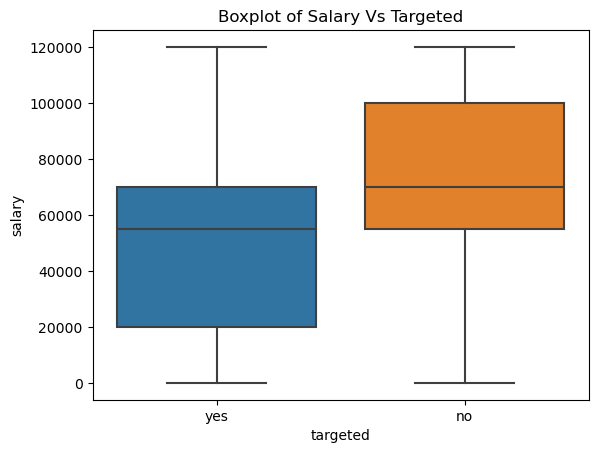

In [31]:

# Salary and Targeted
sns.boxplot(x= 'targeted', y= 'salary', data = bank_data4)
plt.title('Boxplot of Salary Vs Targeted')
plt.show()

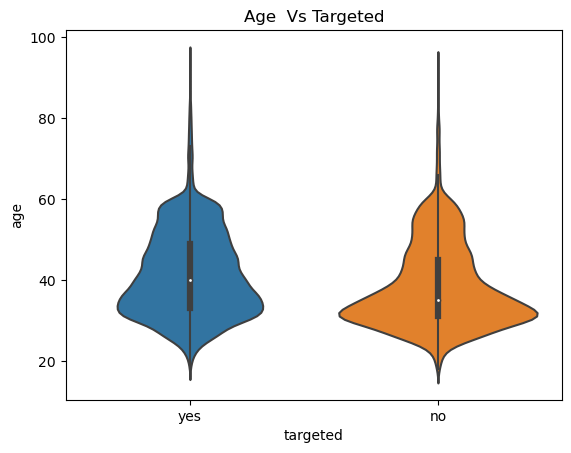

In [32]:
# Age and Targeted


sns.violinplot(x= 'targeted', y= 'age', data = bank_data4)
plt.title('Age  Vs Targeted')
plt.show()

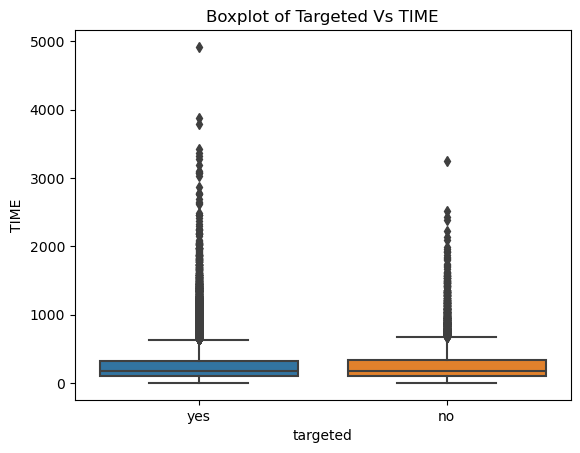

In [33]:
# Time and Targeted
sns.boxplot(x= 'targeted', y= 'TIME', data = bank_data4)
plt.title('Boxplot of Targeted Vs TIME')
plt.show()

In [34]:
# 4. b. Analyze how features like age, job type, education, marital status, etc., associate with the success of the term deposit campaign, 
# using visualizations like bar charts, stacked bar charts, and heat maps.

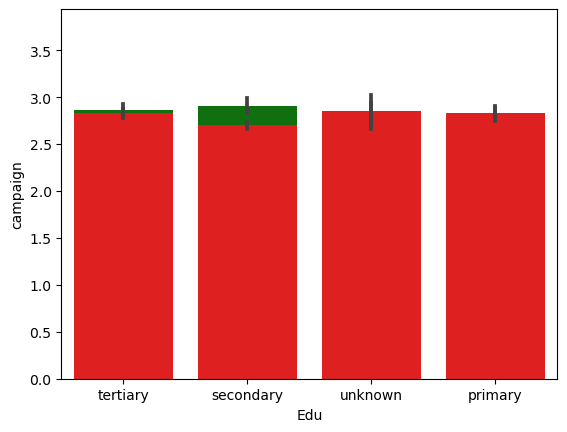

In [35]:
ax = sns.barplot(data = bank_data4, x = "Job", y = "campaign", color = "green")
ax = sns.barplot(data = bank_data4, x = "Edu", y = "campaign", color = "red")
plt.show()

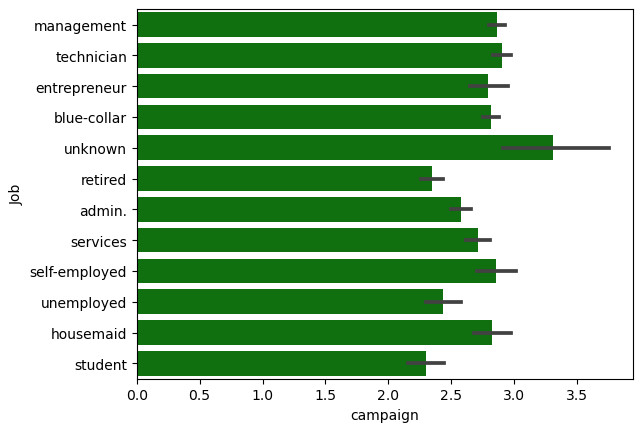

In [36]:
ax = sns.barplot(data = bank_data4, y = "Job", x = "campaign", color = "green")
plt.show()

In [37]:
#4.2 Job Vs Campaign
# bank_data4.plot.bar(x = 'Job', y = 'campaign', stacked = True, title = 'Job Vs Campaign')
# plt.show()

In [38]:
#sns.catplot(data = bank_data4, x = 'Job', y = 'campaign', kind = 'bar')

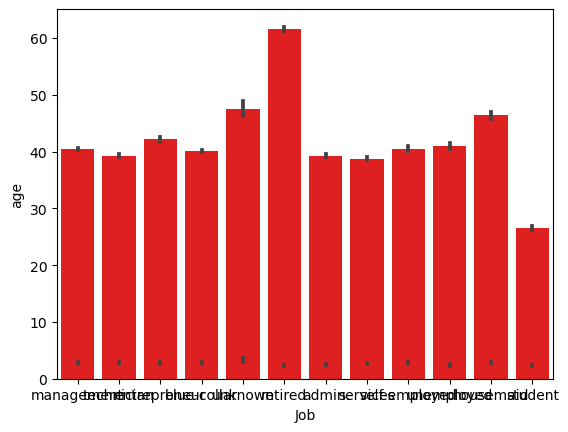

In [39]:
ax = sns.barplot(data = bank_data4, x = "Job", y = "campaign", color = "green")
ax = sns.barplot(data = bank_data4, x = "Job", y = "age", color = "red")
plt.show()

5. Categorical Variables Analysis 

In [44]:
# 5 Distribution
# a. Investigate the distribution of categorical variables such as job type, education, and marital status.
# 1. Job Vs Edu
Job_vs_Edu = pd.pivot_table(bank_data4, values = 'Job', index = 'Edu', aggfunc = 'count')
Job_vs_Edu

1,Job
Edu,
primary,6839
secondary,23180
tertiary,13286
unknown,1856


In [42]:
# 5.1.2. Job Vs Marital Status
Job_vs_Marital = pd.pivot_table(bank_data4, values = 'Job', index = 'marital', aggfunc = 'count')
Job_vs_Marital

1,Job
marital,
divorced,5198
married,27185
single,12778


In [43]:
# 5.1.3. Edu Vs Marital Status
Edu_vs_Marital = pd.pivot_table(bank_data4, values = 'Edu', index = 'marital', aggfunc = 'count')
Edu_vs_Marital

1,Edu
marital,
divorced,5198
married,27185
single,12778


In [ ]:
# 5.b. Assess the impact of these categorical variables on the campaign's success through visualizations like bar charts.

<Figure size 1000x600 with 0 Axes>

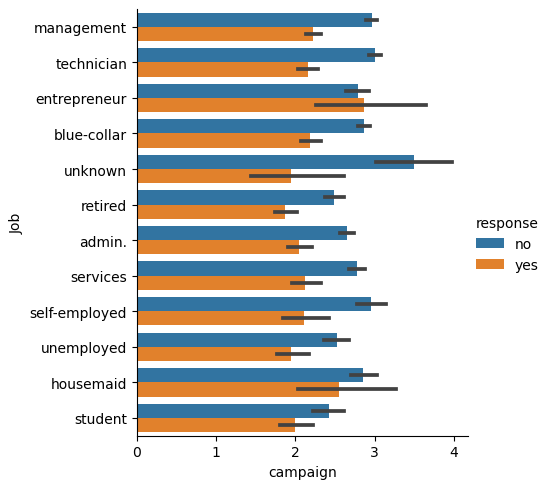

In [45]:
plt.figure(figsize = (10,6))
sns.catplot(data = bank_data4, y = 'Job', x = 'campaign', kind = 'bar', hue = 'response')

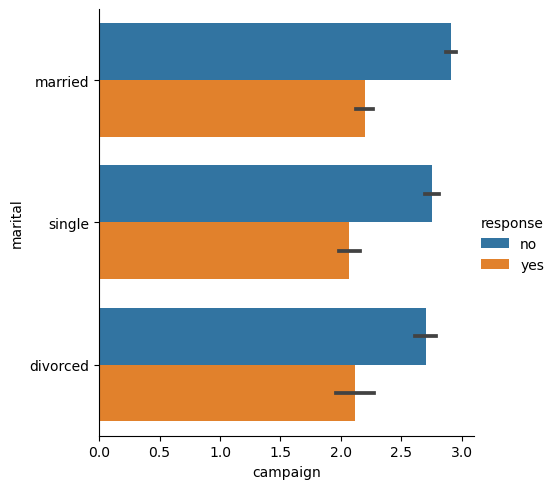

In [46]:
sns.catplot(data = bank_data4, y = 'marital', x = 'campaign', kind = 'bar', hue = 'response')

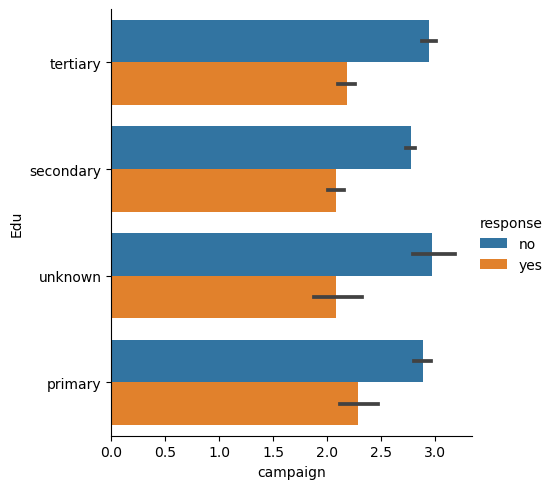

In [47]:
sns.catplot(data = bank_data4, y = 'Edu', x = 'campaign', kind = 'bar', hue = 'response')

6. Temporal Analysis 

In [48]:
#6. a. Investigate temporal patterns in the success of the campaign over time. 

bank_data4['Month'] = pd.to_datetime(bank_data4['month'])
bank_data4.info()


<class 'pandas.core.frame.DataFrame'>
Index: 45161 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   customerid  45161 non-null  float64       
 1   age         45161 non-null  float64       
 2   salary      45161 non-null  float64       
 3   balance     45161 non-null  float64       
 4   marital     45161 non-null  object        
 5   jobedu      45161 non-null  object        
 6   targeted    45161 non-null  object        
 7   default     45161 non-null  object        
 8   housing     45161 non-null  object        
 9   loan        45161 non-null  object        
 10  contact     45161 non-null  object        
 11  day         45161 non-null  object        
 12  month       45161 non-null  object        
 13  duration    45161 non-null  object        
 14  campaign    45161 non-null  float64       
 15  pdays       45161 non-null  float64       
 16  previous    45161 non-null 

C:\Users\hp\AppData\Local\Temp\ipykernel_8888\1236022004.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  bank_data4['Month'] = pd.to_datetime(bank_data4['month'])


In [50]:
#6. 
temporal_analysis = pd.pivot_table(bank_data4, values = "customerid", index = "Month", columns = "response", aggfunc = "count", sort = True)
temporal_analysis

response,no,yes
Month,,
2017-01-01,1261,142
2017-02-01,2207,441
2017-03-01,229,248
2017-04-01,2353,576
2017-05-01,12826,924
2017-06-01,4788,545
2017-07-01,6263,627
2017-08-01,5550,687
2017-09-01,310,269


D:\Vattan\ABADS\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Vattan\ABADS\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='response'>

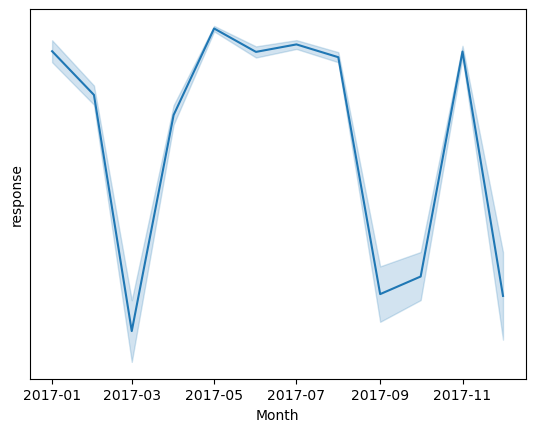

In [51]:
# 6.b. Analyze if specific months or days exhibit superior campaign performance.

sns.lineplot(data = bank_data4, x ='Month', y = 'response')

7. Feature Engineering 

In [52]:
# a. Introduce new features that may enhance prediction, such as creating age groups or income categories.
# Creating Age Group

bank_data5 = bank_data4.copy()
age_bins = [18,30, 45, 58, 100]  # Bins: 18-30, 31-45, 46-58, 59-100
age_labels = ['18-30', '31-45', '46-58', '58+']
bank_data5['age_group'] = pd.cut(bank_data4['age'], bins=age_bins, labels=age_labels)
bank_data5['age_group']

0        46-58
1        31-45
2        31-45
3        46-58
4        31-45
         ...  
45206    46-58
45207      58+
45208      58+
45209    46-58
45210    31-45
Name: age_group, Length: 45161, dtype: category
Categories (4, object): ['18-30' < '31-45' < '46-58' < '58+']

In [53]:
# Salary Group

salary_bins = [0, 30000, 60000, 90000, 150000]  # Bins: 0-30k, 30k-60k, 60k-90k, 90k-150k
salary_labels = ['Low', 'Medium', 'High', 'v. Pricely']
bank_data5['salary_group'] = pd.cut(bank_data5['salary'], bins=salary_bins, labels=salary_labels)
bank_data5

1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,pdays,previous,poutcome,response,TIME,Job,Edu,Month,age_group,salary_group
0,1.0,58.0,100000.0,2143.0,married,"management,tertiary",yes,no,yes,no,...,-1.0,0.0,unknown,no,261.0,management,tertiary,2017-05-01,46-58,v. Pricely
1,2.0,44.0,60000.0,29.0,single,"technician,secondary",yes,no,yes,no,...,-1.0,0.0,unknown,no,151.0,technician,secondary,2017-05-01,31-45,Medium
2,3.0,33.0,120000.0,2.0,married,"entrepreneur,secondary",yes,no,yes,yes,...,-1.0,0.0,unknown,no,76.0,entrepreneur,secondary,2017-05-01,31-45,v. Pricely
3,4.0,47.0,20000.0,1506.0,married,"blue-collar,unknown",no,no,yes,no,...,-1.0,0.0,unknown,no,92.0,blue-collar,unknown,2017-05-01,46-58,Low
4,5.0,33.0,0.0,1.0,single,"unknown,unknown",no,no,no,no,...,-1.0,0.0,unknown,no,198.0,unknown,unknown,2017-05-01,31-45,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207.0,51.0,60000.0,825.0,married,"technician,tertiary",yes,no,no,no,...,-1.0,0.0,unknown,yes,977.0,technician,tertiary,2017-11-01,46-58,Medium
45207,45208.0,71.0,55000.0,1729.0,divorced,"retired,primary",yes,no,no,no,...,-1.0,0.0,unknown,yes,456.0,retired,primary,2017-11-01,58+,Medium
45208,45209.0,72.0,55000.0,5715.0,married,"retired,secondary",yes,no,no,no,...,184.0,3.0,success,yes,1127.0,retired,secondary,2017-11-01,58+,Medium
45209,45210.0,57.0,20000.0,668.0,married,"blue-collar,secondary",yes,no,no,no,...,-1.0,0.0,unknown,no,508.0,blue-collar,secondary,2017-11-01,46-58,Low


In [54]:
bank_data5.groupby(['age_group', 'salary_group'])['response'].value_counts()

C:\Users\hp\AppData\Local\Temp\ipykernel_8888\2101410124.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bank_data5.groupby(['age_group', 'salary_group'])['response'].value_counts()


age_group  salary_group  response
18-30      Low           no          2033
                         yes          432
           Medium        no          2008
                         yes          363
           High          no           728
                         yes           92
           v. Pricely    no          1092
                         yes          246
31-45      Low           no          6302
                         yes          524
           Medium        no          7378
                         yes          851
           High          no          2091
                         yes          197
           v. Pricely    no          5500
                         yes          761
46-58      Low           no          3230
                         yes          264
           Medium        no          3886
                         yes          430
           High          no           921
                         yes           73
           v. Pricely    no          2620


In [ ]:
From the above output we can clearly see that company needs to target on the High and v. Pricely salary groups 
of all the age groups more to increase the response rate.

#8. Correlation Analysis

In [55]:
# a. Examine correlations between independent variables to identify multicollinearity.
correlation = bank_data4[['age', 'salary', 'campaign', 'TIME']].corr()
correlation

1,age,salary,campaign,TIME
1,,,,
age,1.000000,0.024513,0.004814,-0.004392
salary,0.024513,1.000000,0.015010,-0.009988
campaign,0.004814,0.015010,1.000000,-0.084379
TIME,-0.004392,-0.009988,-0.084379,1.000000


In [56]:
#8.b  Evaluate how correlated features may influence the target variable. 

bank_data4[["age","salary", "campaign", "TIME", "targeted"]].groupby('targeted').describe().T

targeted                   no            yes
1                                           
age      count    8110.000000   37051.000000
         mean       38.365845      41.498286
         std        10.338884      10.596392
         min        18.000000      18.000000
         25%        31.000000      33.000000
         50%        35.000000      40.000000
         75%        45.000000      49.000000
         max        93.000000      95.000000
salary   count    8110.000000   37051.000000
         mean    72289.025894   53659.334431
         std     33644.636850   30739.576586
         min         0.000000       0.000000
         25%     55000.000000   20000.000000
         50%     70000.000000   55000.000000
         75%    100000.000000   70000.000000
         max    120000.000000  120000.000000
campaign count    8110.000000   37051.000000
         mean        2.782861       2.759089
         std         3.314646       3.047273
         min         1.000000       1.000000
         25%         1.000000       1.000000
         50%         2.000000       2.000000
         75%         3.000000       3.000000
         max        63.000000      58.000000
TIME     count    8110.000000   37051.000000
         mean      263.831443     256.926426
         std       260.074485     257.027104
         min         2.000000       0.000000
         25%       103.000000     103.000000
         50%       181.000000     180.000000
         75%       332.000000     316.000000
         max      3253.000000    4918.000000

9. Outlier Detection and Handling

<Axes: >

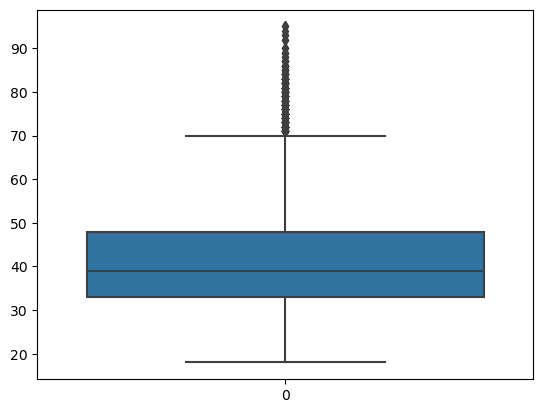

In [57]:
# Identification of Outliers
#For Age

sns.boxplot(data = bank_data4['age'])

<Axes: >

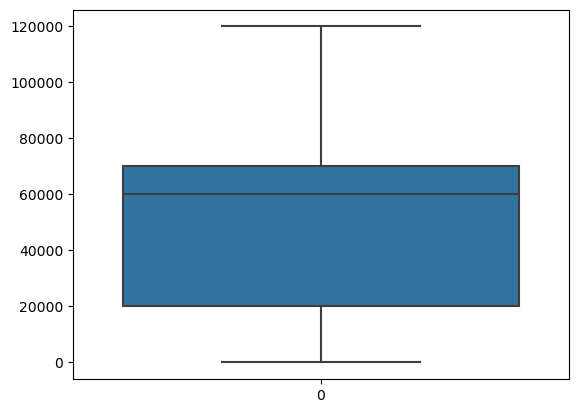

In [58]:
# For Salary

sns.boxplot(data = bank_data4['salary'])

<Axes: >

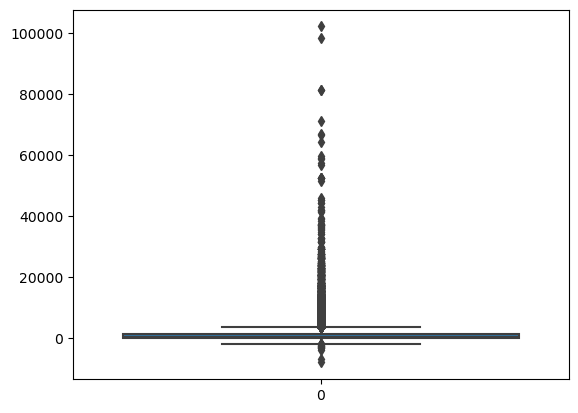

In [59]:
# For Balance

sns.boxplot(data = bank_data4['balance'])

<Axes: >

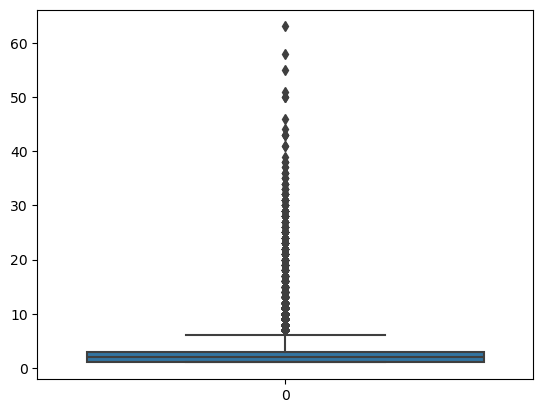

In [60]:
# For Campaign

sns.boxplot(data = bank_data4['campaign'])

Removing Outliers

In [61]:
# Removing outlier of Age
z_age = stats.zscore(bank_data4['age'])
z_age

abs_z_age = np.abs(z_age)
abs_z_age

0        1.607003
1        0.288571
2        0.747340
3        0.571092
4        0.747340
           ...   
45206    0.947787
45207    2.831261
45208    2.925435
45209    1.512829
45210    0.370646
Name: age, Length: 45161, dtype: float64

In [62]:
age_median = bank_data4['age'].median()
age_median

39.0

<Axes: >

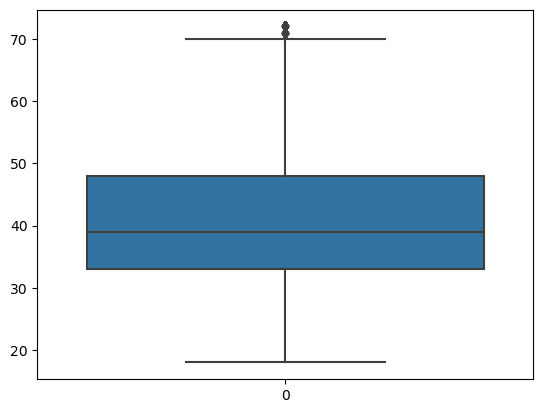

In [63]:
bank_data4['age'] = np.where(abs_z_age>3,age_median,bank_data4['age'])
sns.boxplot(bank_data4['age'])

In [64]:
# Removing Outliers of Salary
bank_data4['salary'].skew()

0.13770754746825994

In [ ]:
# As the SKEWNESS of SALARY is 0.1377, which is lying between -0.5 to 0.5, shows that it is Approximately Symmetric.

In [65]:
#Removing Outliers of Balance
z_balance = stats.zscore(bank_data4['balance'])
z_balance

abs_z_balance = np.abs(z_balance)
abs_z_balance

0        0.256130
1        0.437916
2        0.446780
3        0.046997
4        0.447109
           ...   
45206    0.176582
45207    0.120210
45208    1.428852
45209    0.228126
45210    0.527971
Name: balance, Length: 45161, dtype: float64

In [66]:
balance_median = bank_data4['balance'].median()
balance_median

448.0

<Axes: >

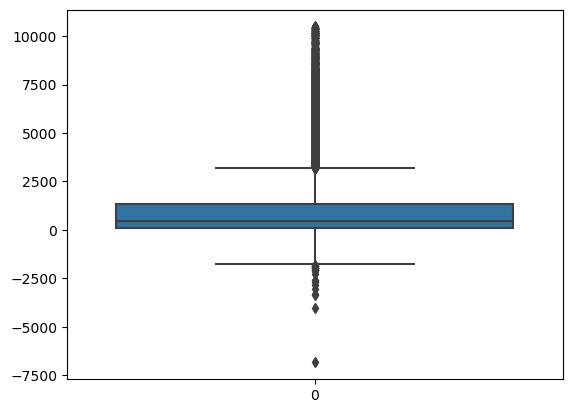

In [67]:
bank_data4['balance'] = np.where(abs_z_balance>3,balance_median,bank_data4['balance'])
sns.boxplot(bank_data4['balance'])

In [68]:
# Removing Outlier of Campaign
z_camp = stats.zscore(bank_data4['campaign'])
z_camp

abs_z_camp = np.abs(z_camp)
abs_z_camp

0        0.569389
1        0.569389
2        0.569389
3        0.569389
4        0.569389
           ...   
45206    0.076412
45207    0.246489
45208    0.722213
45209    0.399312
45210    0.246489
Name: campaign, Length: 45161, dtype: float64

In [69]:
camp_mean = bank_data4['campaign'].mean()
camp_mean

2.7633577644427714

<Axes: >

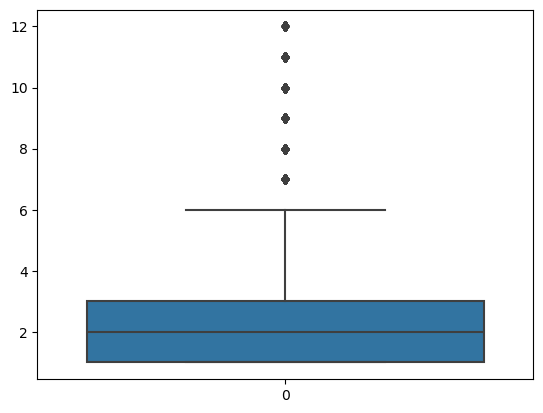

In [70]:
bank_data4['campaign'] = np.where(abs_z_camp>3,camp_mean,bank_data4['campaign'])
sns.boxplot(bank_data4['campaign'])